# Basics of Graphs

## Decomposing features (signal) and structure

As we saw in the lesson on Transformers, natural language can also be decomposed to signal and structure. The structure is the order of words, which implies syntax and grammar context. 

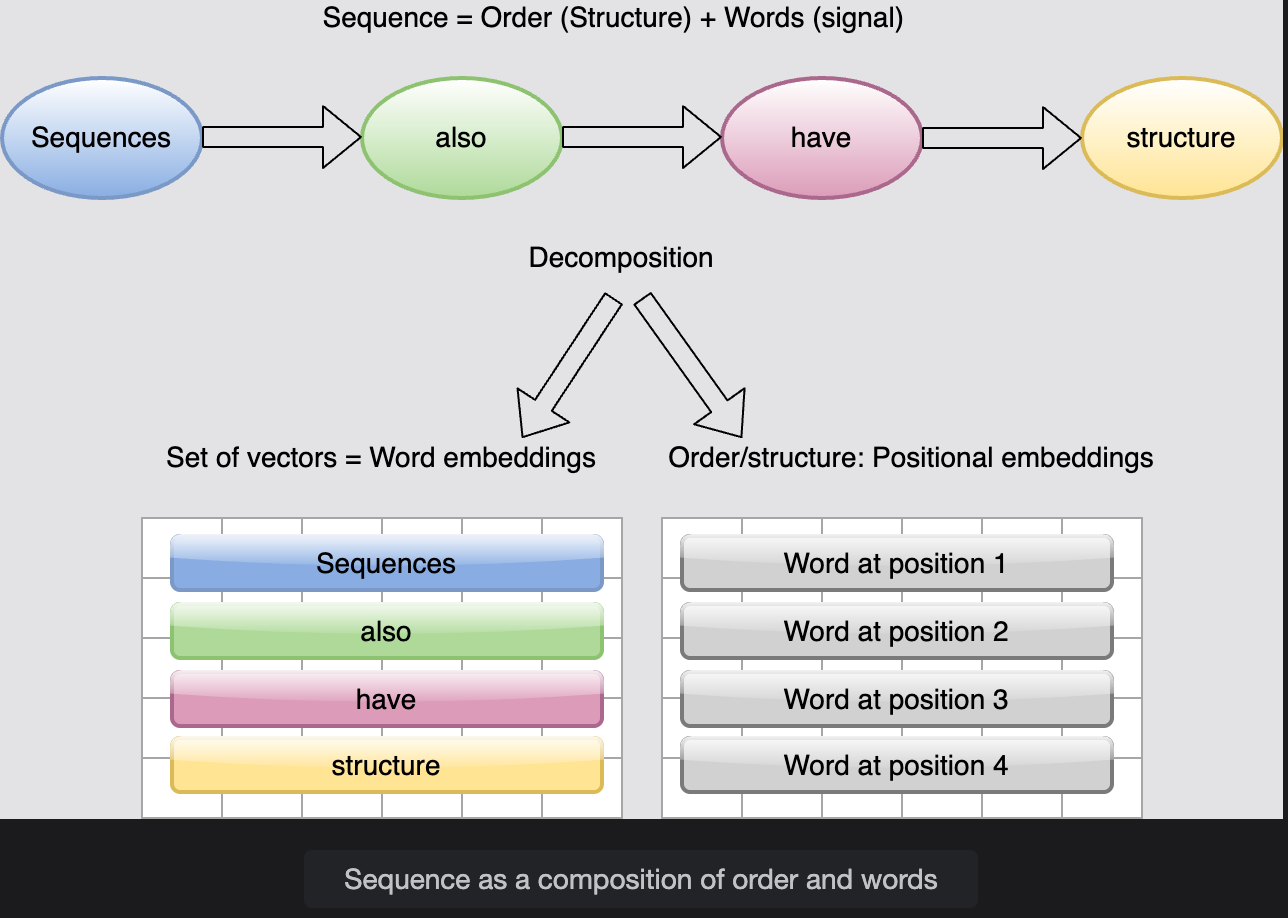

The features will now be a set of word embeddings, and the order will be encoded in the positional embeddings.

Graphs are not any different: they are data with decomposed structure and signal information.

## Real-world signals that we can model with graphs

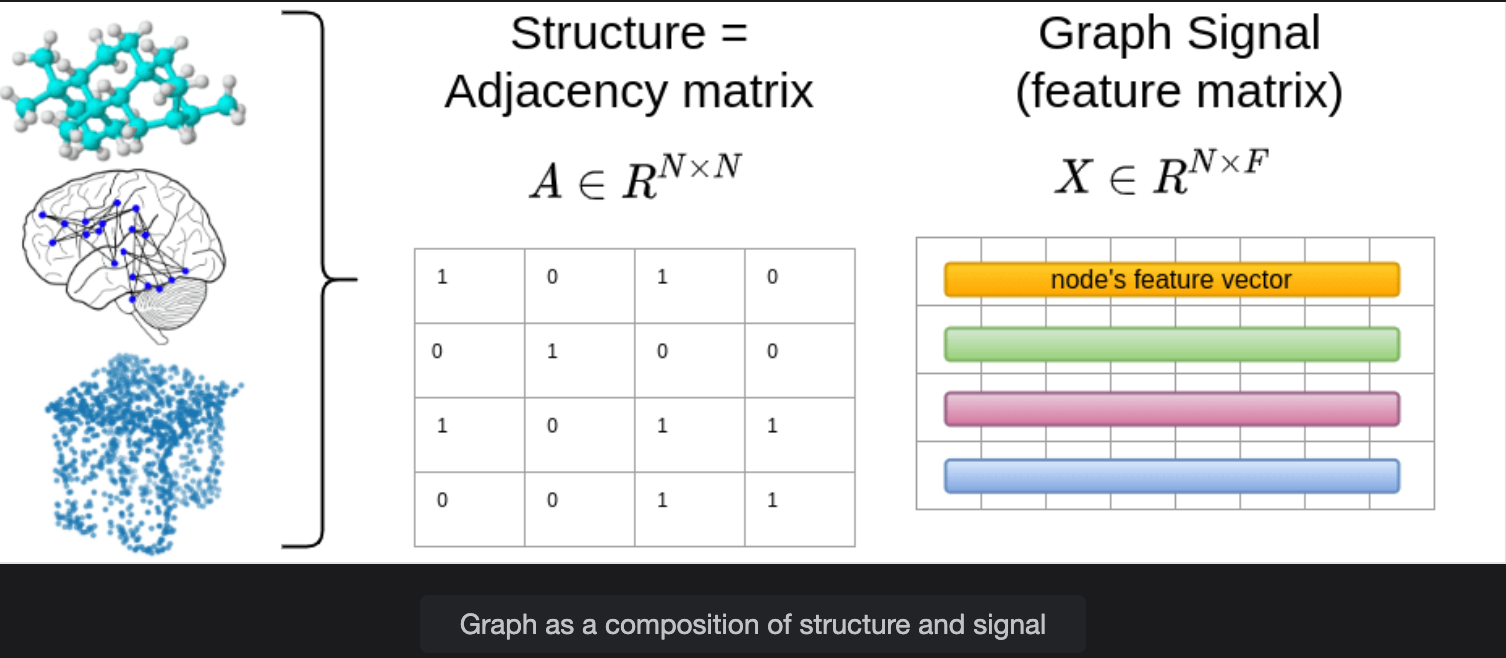

To this end, we can represent brain graphs from functional medical imaging, social networks, point clouds, and even molecules and proteins.

In [1]:
# calculating degree

import torch
#rand binary Adj matrix
a = torch.rand(3,3)
a[a>0.5] = 1
a[a<=0.5] = 0

def calc_degree_matrix(a):
 return torch.diag(a.sum(dim=-1))

d = calc_degree_matrix(a)

print("A:" ,a)
print("D:", d)

A: tensor([[1., 0., 1.],
        [0., 0., 1.],
        [1., 0., 1.]])
D: tensor([[2., 0., 0.],
        [0., 1., 0.],
        [0., 0., 2.]])


## The graph Laplacian

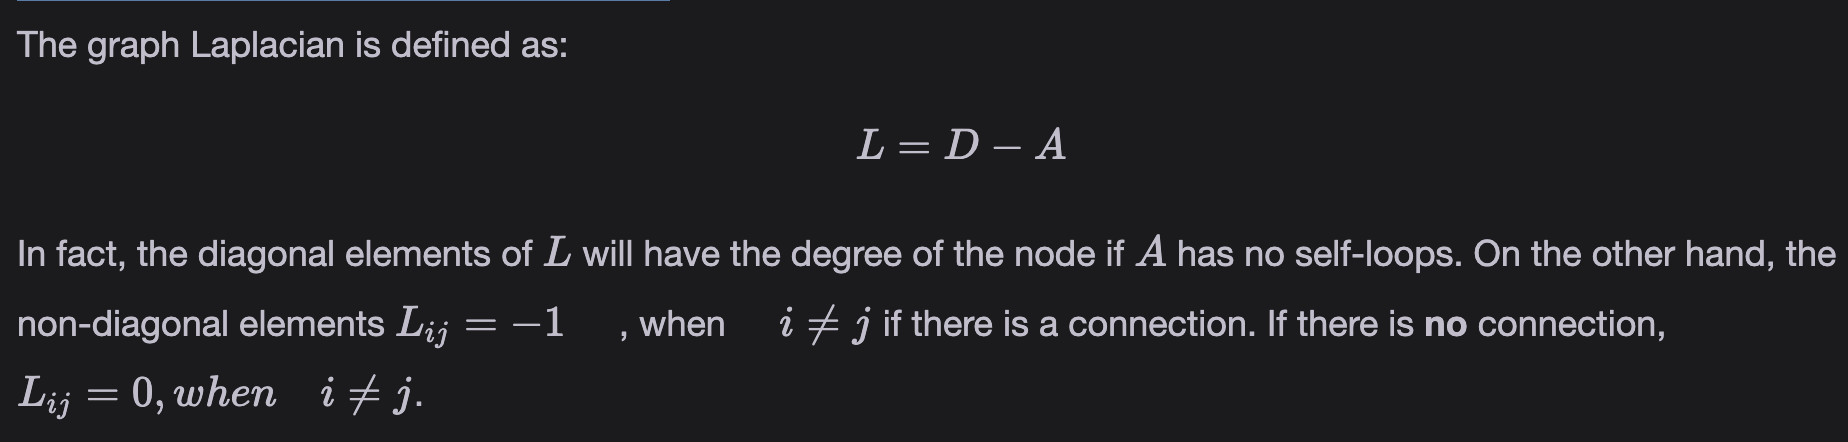

In [2]:
import torch
#rand binary Adj matrix
a = torch.rand(5,5)
a[a>0.5] = 1
a[a<=0.5] = 0

def calc_degree_matrix(a):
 return torch.diag(a.sum(dim=-1))

def create_graph_lapl(a):
 return calc_degree_matrix(a)-a

print("A:", a)
print("L:", create_graph_lapl(a))

A: tensor([[1., 0., 1., 0., 0.],
        [0., 1., 0., 1., 1.],
        [0., 1., 1., 1., 0.],
        [0., 0., 1., 1., 1.],
        [1., 1., 0., 0., 0.]])
L: tensor([[ 1.,  0., -1.,  0.,  0.],
        [ 0.,  2.,  0., -1., -1.],
        [ 0., -1.,  2., -1.,  0.],
        [ 0.,  0., -1.,  2., -1.],
        [-1., -1.,  0.,  0.,  2.]])


However, in graph neural networks, we use its normalized version because nodes have varying connectivity and, as a result, a big range of degree values on D.

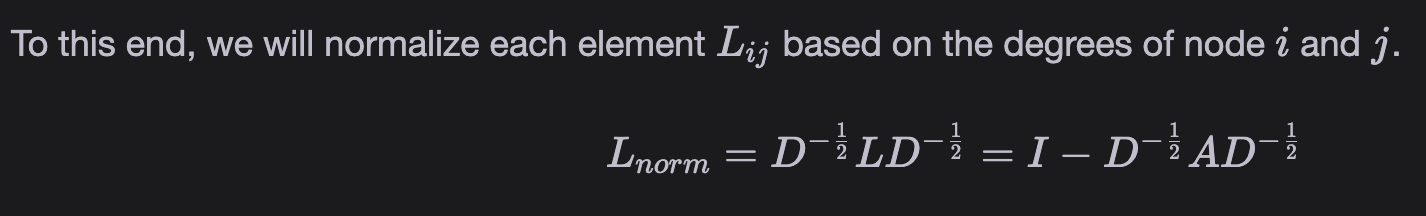

In [3]:
import torch
#rand binary Adj matrix
a = torch.rand(5,5)
a[a>0.5] = 1
a[a<=0.5] = 0


def calc_degree_matrix_norm(a):
 return torch.diag(torch.pow(a.sum(dim=-1),-0.5))

def create_graph_lapl_norm(a):
 size = a.shape[-1]
 D_norm = calc_degree_matrix_norm(a)
 L_norm = torch.ones(size) - (D_norm @ a @ D_norm )
 return L_norm

print("A: ", a)
print("L_norm: ", create_graph_lapl_norm(a))

A:  tensor([[1., 1., 0., 1., 0.],
        [1., 0., 1., 0., 1.],
        [1., 0., 1., 1., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
L_norm:  tensor([[0.6667, 0.6667, 1.0000, 0.4226,    nan],
        [0.6667, 1.0000, 0.6667, 1.0000,   -inf],
        [0.6667, 1.0000, 0.6667, 0.4226,    nan],
        [1.0000, 0.4226, 1.0000, 1.0000,    nan],
        [   nan,    nan,    nan,    nan,    nan]])
